# House Price Prediction

### Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score

### Loading the House Price Prediction Data 

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/alfisaifee/DAMG-6105-FinalProject/main/train.csv")

print("Train Data Dimensions :", train_df.shape)

Train Data Dimensions : (1460, 81)


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
data_types = train_df.dtypes
data_types.groupby(data_types).count()

int64      35
float64     3
object     43
dtype: int64

In [9]:
# Extracting numerical variables
numerical_features = train_df.select_dtypes(include = ['int64', 'float64'])

display(numerical_features.head(5))
numerical_features.drop(columns=['Id'], inplace=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


C:\Users\alfia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
print(numerical_features.columns.values)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


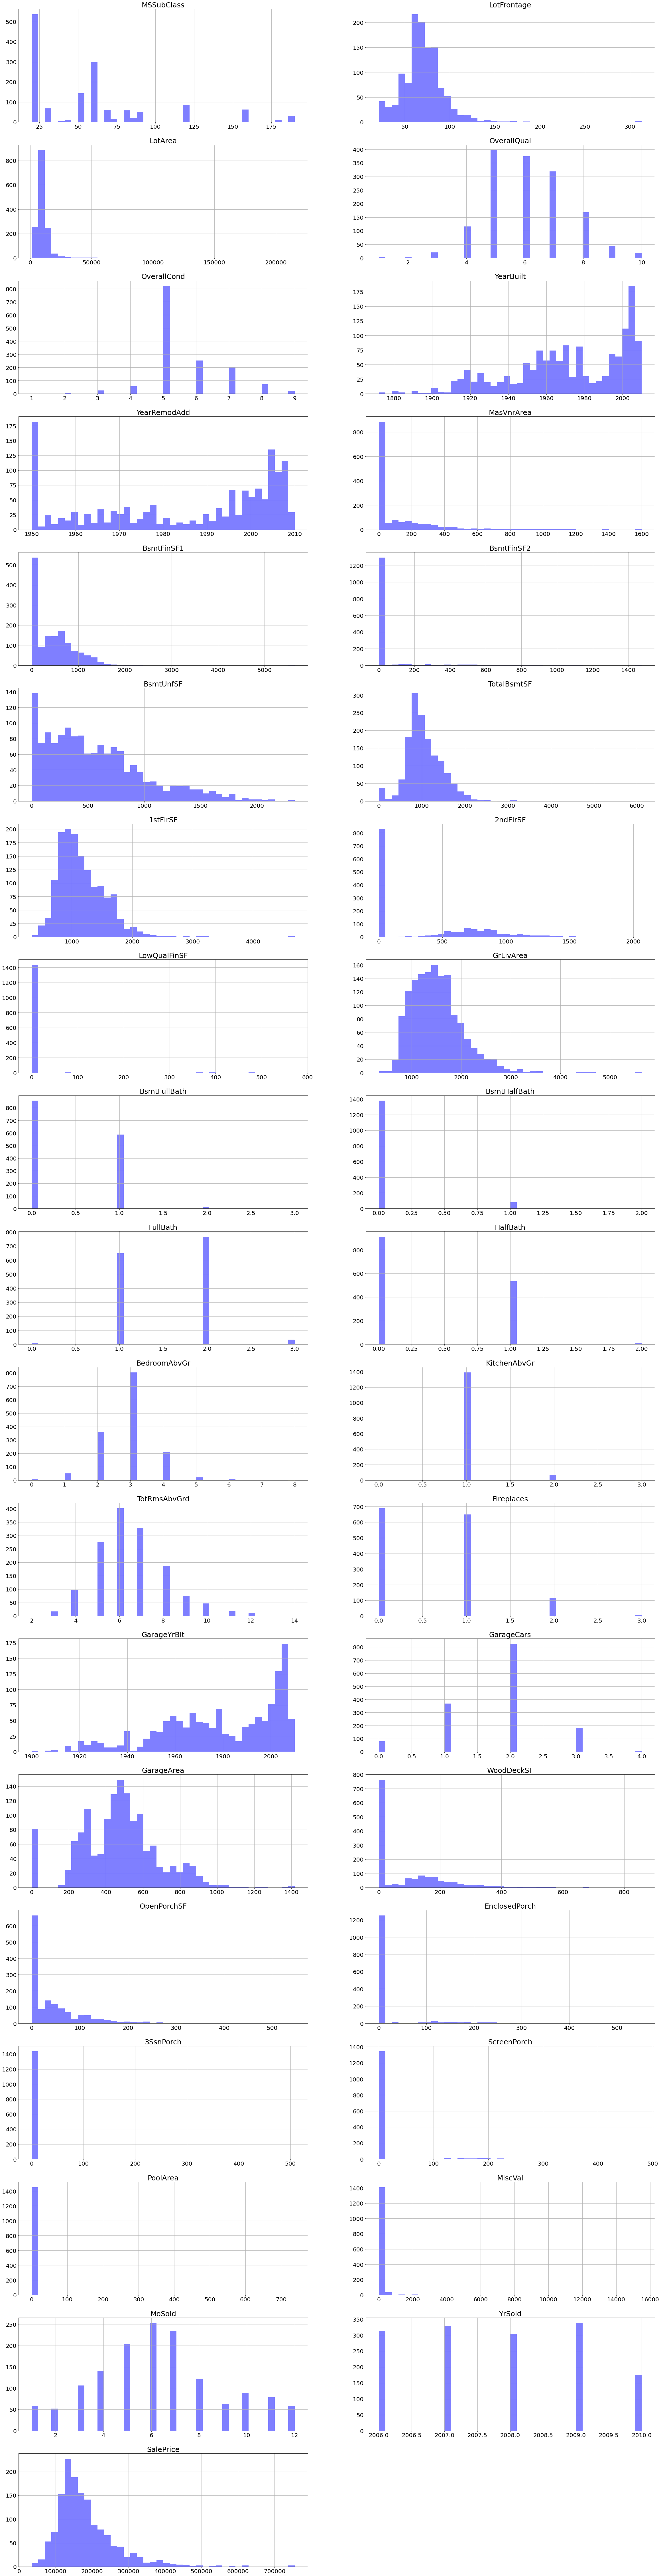

In [11]:
fig = plt.figure()
for i, feature in enumerate(numerical_features.columns):
    ax = fig.add_subplot(23,2,i+1)
    train_df[feature].hist(bins=40, ax=ax, color='blue',alpha=0.5, figsize=(40,200))
    ax.set_title(feature, fontsize = 25)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.set_xlabel('')
plt.show()

<AxesSubplot:>

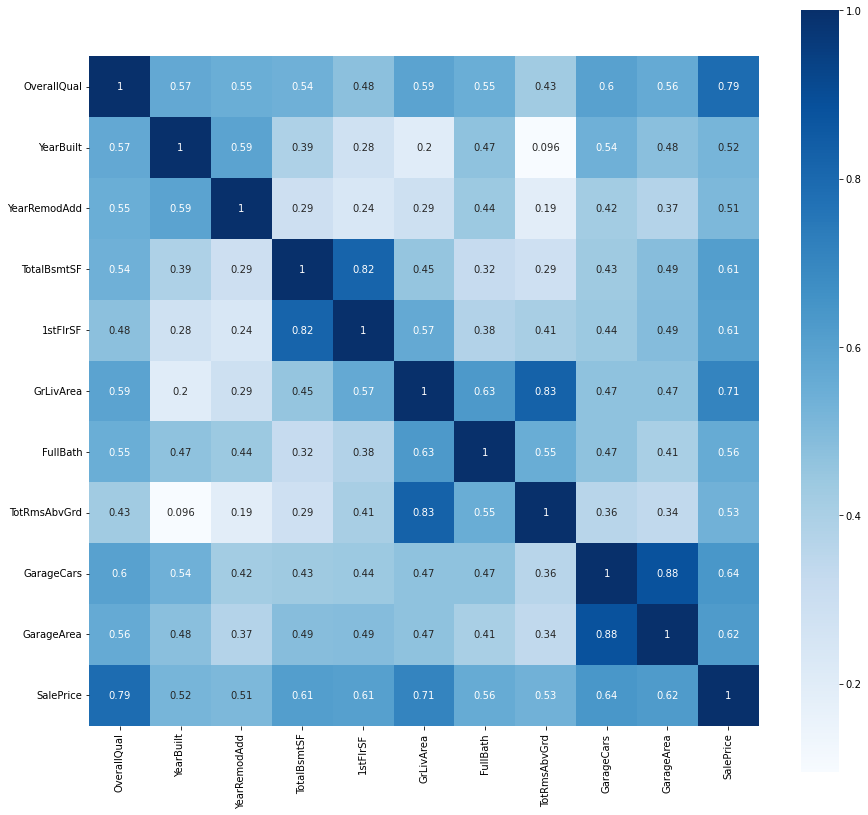

In [12]:
# Feature Analysis
corr = train_df.corr()
high_corr_features = corr.index[corr["SalePrice"]>0.5]
plt.subplots(figsize=(15,14))
sns.heatmap(train_df[high_corr_features].corr(),annot=True, cmap="Blues", square=True)

In [13]:
# Top 10 correlations
corr = (train_df.corr()['SalePrice']).sort_values(ascending=False)
print(corr.head(11))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [14]:
# Analyzing target variable
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


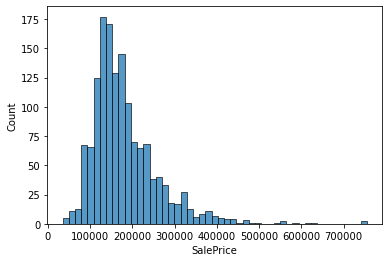

In [15]:
sns.histplot(train_df['SalePrice'])
print("Skewness: %f" % train_df['SalePrice'].skew())

In [16]:
## Normal distribution (bell-shaped) of variables is one of the assumptions of regression problems. The sale price is right skewed and needs to be normalised

### Data Preprocessing

#### Step 1 : Remove the id column

In [17]:
# train_df.drop(columns=['Id'], inplace=True)

#### Step 2 : Evaluate Missing Values

In [18]:
def missing_values_sum(data):
    missing_data_df = pd.DataFrame({'FeatureName':[], 'TotalMissingValues':[], 'PercentMissingValues':[]})
    for feature in data.columns:
        sum_missing = train_df[feature].isnull().sum()
        missing_data_df.loc[len(missing_data_df.index)] = [feature, sum_missing, round((sum_missing/train_df.shape[0])*100,2)]
    return missing_data_df
        
missing_data_df = missing_values_sum(train_df)
missing_data_df[missing_data_df['TotalMissingValues'] > 0].sort_values(by='TotalMissingValues', ascending=False).style.background_gradient()

,FeatureName,TotalMissingValues,PercentMissingValues
72,PoolQC,1453.000000,99.520000
74,MiscFeature,1406.000000,96.300000
6,Alley,1369.000000,93.770000
73,Fence,1179.000000,80.750000
57,FireplaceQu,690.000000,47.260000
3,LotFrontage,259.000000,17.740000
58,GarageType,81.000000,5.550000
59,GarageYrBlt,81.000000,5.550000
60,GarageFinish,81.000000,5.550000
63,GarageQual,81.000000,5.550000


#### Step 3 : Drop columns with missing values greater than 75%

In [19]:
drop_columns = missing_data_df[missing_data_df['PercentMissingValues'] > 75.0].FeatureName.tolist()
print("Columns to drop : ", drop_columns)
print("Number of columns to drop : ", len(drop_columns))
train_df = train_df.drop(drop_columns,axis=1)

Columns to drop :  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Number of columns to drop :  4


In [20]:
# Dropping features that are related to the ones we just removed
train_df = train_df.drop(['MiscVal', 'PoolArea'], axis=1)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [21]:
zero_fireplace = train_df[train_df['Fireplaces'] == 0]
null_fireplace_qu = train_df[train_df['FireplaceQu'].isnull()]

zero_fireplace['Id'].equals(null_fireplace_qu['Id']) 

True

In [22]:
train_df.FireplaceQu = train_df.FireplaceQu.fillna('NA')

In [23]:
missing_data_df = missing_values_sum(train_df)
corr_column_names = missing_data_df[missing_data_df['TotalMissingValues'] > 0].FeatureName.tolist()
corr_column_names.append('SalePrice')
train_df[corr_column_names].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


In [24]:
columns_to_remove = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train_df = train_df.drop(columns_to_remove,axis=1)

In [25]:
missing_data_df = missing_values_sum(train_df)
missing_data_columns = missing_data_df[missing_data_df['TotalMissingValues'] > 0].FeatureName.tolist()
for column in missing_data_columns:
    print(column, " : ",train_df[column].unique())

MasVnrType  :  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual  :  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond  :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure  :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1  :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2  :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical  :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
GarageType  :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish  :  ['RFn' 'Unf' 'Fin' nan]
GarageQual  :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond  :  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [26]:
for column in ['GarageType','GarageFinish','BsmtFinType2','BsmtFinType1','BsmtExposure','GarageCond','GarageQual','BsmtCond','BsmtQual']:
    train_df[column].fillna('NA', inplace=True)

train_df['MasVnrType'].fillna('None',inplace=True)

In [27]:
missing_data_df = missing_values_sum(train_df)
missing_data_df[missing_data_df['TotalMissingValues'] > 0]

,FeatureName,TotalMissingValues,PercentMissingValues
39,Electrical,1.0,0.07


In [28]:
# For the variables that have low missing percentages (<1%), we will just drop the missing observations.
train_df = train_df.dropna(how='any', subset=['Electrical'])
print(train_df.shape)

(1459, 72)


In [29]:
#Changing numerical data to categorical
train_df = train_df.replace({
    'MoSold' : {1 : 'Jan', 2 : 'Feb', 3: 'Mar', 4 : 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
})

Transform and Scaling

<AxesSubplot:ylabel='Count'>

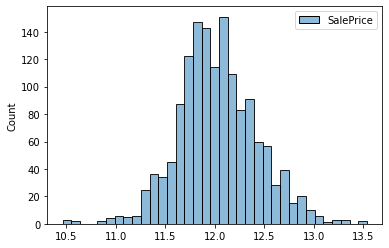

In [30]:
# Transform sale price (Normaly distributed)
train_target = pd.DataFrame(np.log(train_df['SalePrice']),columns=['SalePrice'])
train_df = train_df.drop(columns=['SalePrice'])
sns.histplot(train_target)

<AxesSubplot:ylabel='Count'>

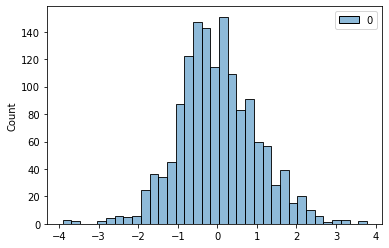

In [31]:
scaler = preprocessing.StandardScaler().fit(train_target)
train_target = pd.DataFrame(scaler.transform(train_target))
sns.histplot(train_target)

In [32]:
columns_to_scale = ['LotArea','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                    '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','YrSold']
train_scale = train_df[columns_to_scale]
train_df_rem = train_df.drop(columns_to_scale,axis = 1)
print(train_df_rem.shape,train_scale.shape)

(1459, 53) (1459, 18)


In [33]:
scaler = preprocessing.StandardScaler().fit(train_scale)
train_sc = pd.DataFrame(scaler.transform(train_scale))
train_sc.columns = columns_to_scale 
print(train_sc.shape, train_df_rem.shape)

(1459, 18) (1459, 53)


In [34]:
# df_list = [X_train,X_con_sc]
#pd.DataFrame(np.hstack([train_sc,train_df_rem]))
train_df_merge = pd.DataFrame(np.hstack([train_sc,train_df_rem]))
print(train_df_merge.shape)

(1459, 71)


Encoding Cayegorical Variables

In [35]:
# Simmilar to OverallQual and OverallCond, we will convert few categorical features to an interval scale
# Manual Label Encoding 

train_df = train_df.replace({
    'Utilities': {'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4},
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtExposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu': {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageFinish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
    'GarageQual': {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'NA':0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
})

In [36]:
# sns.scatterplot(data=train_df, x="MSSubClass", y="SalePrice")

In [37]:
# One Hot encoding for categorical features
train_df_numerical = train_df.select_dtypes(include=['int64', 'float64'])
train_df_categorical = train_df.select_dtypes(include=['object'])
train_df_one_hot = pd.get_dummies(train_df_categorical, drop_first=True)

In [38]:
train_df_encoded = pd.concat([train_df_numerical, train_df_one_hot], axis=1)
train_df_encoded.shape

(1459, 209)

In [39]:
train_df_encoded.drop(columns=['Id'],axis=1, inplace=True)

Split Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df_encoded, train_target, test_size=0.2, random_state=42)

In [41]:
my_knn_model = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform')
my_knn_model.fit(X_train,Y_train)

KNeighborsRegressor()

In [42]:
Y_pred = my_knn_model.predict(X_test)

In [47]:
# mean_squared_error(y_test, knn.predict(x_test))
rmse = my_knn_model.score(X_test, Y_test)
print(rmse)

0.7258139156838257
